# Eye Image Processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

We firstly load the image and crop out eyebrow regions

For referencing:
* `76.png`, `207.png` is a good closing eye image
* `100.png`, `123.png` is a good opening eye image

In [83]:
filename = "eyes/155.png"

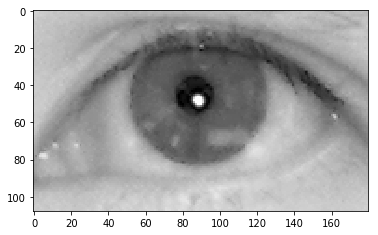

In [84]:
eye = cv2.imread(filename, 0)
img_length = eye.shape[0]
eye = eye[round(img_length*0.2):round(img_length*0.8), :]
plt.imshow(eye, cmap = 'gray')
plt.show()

Then we do an adaptive threshold on the image. The result is the blurred and thresholed again to smooth out contours

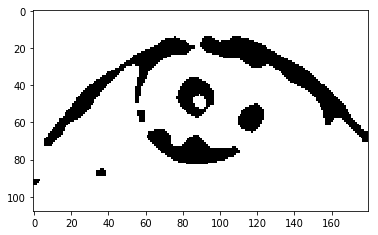

In [94]:
upper_th = cv2.adaptiveThreshold(eye,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 45, 20)
upper_th = cv2.blur(upper_th, (8, 8))
_, upper_th = cv2.threshold(upper_th, 100, 255, cv2.THRESH_BINARY)
plt.imshow(upper_th, cmap="gray")
plt.show()

We then determine the top highest amount of the dot, and construct a second-order equation

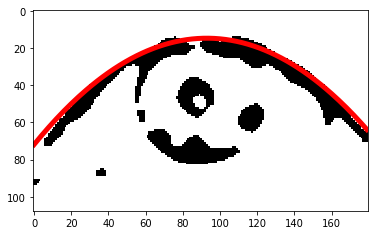

In [96]:
y = np.argmin(upper_th, axis=0)
x = np.arange(0, eye.shape[1])

a, b, c = np.polyfit(x, y, deg=2)
plt.imshow(upper_th, cmap="gray")
plt.plot(x, a*x**2 + b*x + c, linewidth=5, c="red")
plt.show()